# CoderHouse: Carrera de Data Sciencie

## Data Science 2: Machine learning para la ciencia de datos

### Alumno: Pablo Sotomayor

### Comisión: 75670

## Introducción

La administración de préstamos es un punto central de las organizaciones financieras en la actualidad. Especialmente si hablamos de entidades bancarias. Los bancos obtienen importantes ingresos de la concesión de préstamos. Transformandose los mismos en uno de los productos más importantes de estas compañias.
Sin embargo, esto suele conllevar riesgos, ya que el prestatario podría incumplir el prestamo. Es decir podría caer en default.
Por tal motivo el análisis y la predicción de los clientes que caerían en default es fundamental para la toma de desiciones de los bancos, en relación al otorgamiento o declinamiento de un préstamo.
Como respuesta a ello, este trabajo se centra en la exploración, analisis y tratamiento de un conjunto de datos relacionados con el incumplimiento de pago de préstamos para vivienda y, en consecuencia, en la construcción de un modelo de clasificación que predice si un cliente o prestatario caerá en default o no.  

## Descripción del Problema

El incumplimiento del pago de préstamos (default) es un problema que pone en riesgo las ganancias de la compañia (el banco), asi como también, su estabilidad y solvencia. Desarrollar un modelo predictivo clasificatorio, con la calidad suficiente, que arroje diferentes insights, es de suma importancia para la toma de decisiones en relación al otorgamiento o no de un préstamo.

## Objetivo

El objetivo primordial de este trabajo es construir un modelo de aprendizaje supervisado clasificatorio, que sea capaz de predecir si un cliente/prestatario va a pagar o no un préstamo.


## Fuente de datos

El dataset empleado en este trabajo fue obtenido de Kaggle:

https://www.kaggle.com/datasets/yasserh/loan-default-dataset

Este dataset cuenta con información relevante acerca de préstamos para vivienda, prestatarios (clientes que solicitaron un préstamo), características de los préstamos y perfil de los préstamos (tipo de préstamo, limite del préstamo, proposito del préstamo, solvencia del pagador, etc). Esta información nos permitirá crear un modelo predictivo para deteminar el posible incurrimiento en impago de préstamos (es decir default).


## Importación de Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import warnings

## Carga y ordenamiento de datos

In [ ]:
url = 'https://raw.githubusercontent.com/Psotomay/CoderDS2/refs/heads/main/Loan_Default%20(clientes%20pagaran%20o%20no%20un%20credito).csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(url,index_col=False)#.sort_index(axis=0)#index_col=0
df.sort_values(by='ID',ignore_index=True,inplace=True,na_position='first')
df.head(6).round(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.73,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.20,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.02,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.68,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.38,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.30,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.89,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.99,0.15,370.0,360.0,not_neg,not_int,not_lpsm,1008000.0,sb,pr,home,1U,10080.0,EXP,864,EXP,35-44,not_inst,70.09,North,direct,0,40.0


### Metadata

DICCIONARIO DE DATOS

- ID: Identificador del préstamo.
- year: año del préstamo.
- loan_limit: Límite de préstamo.
- Gender: Genero del prestatario.
- approv_in_adv: Aprobado de antemano. No aprobado de o aprobado.
- loan_type: tipo de préstamos.
- loan_purpose: proposito del préstamo.  
- Credit_Worthiness: solvencia del pagador.
- open_credit: crédito abierto. si o no.
- business_or_commercial: préstamos comercial o personal.
- loan_amount: Monto del préstamo.
- rate_of_interest: Porcentaje de interés.
- Interest_rate_spread: Diferencial de tipos de interés.
- Upfront_charges: Cargos iniciales.
- term: Término. Plazo de pago.
- Neg_ammortization: Amortización negociable.
- interest_only: Sólo interés. Si o no.
- lump_sum_payment: Pago de suma global.
- property_value: Valor de la propiedad.
- construction_type: Tipo de construcción.
- occupancy_type: Tipo de ocupación del prestatario.
- Secured_by: por quien esta asegurado. Garante.
- total_units: total de préstamos pedidos.
- income: ingreso/salario del prestatario.
- credit_type: tipo de crédito.
- Credit_Score: puntaje crediticio del prestatario.
- co-applicant_credit_type: Tipo de crédito del cosolicitante.
- age: rango de edad del prestatario.
- submission_of_application: Presentación de solicitud.
- LTV: Valor LTV. LTV es un medida que compara el monto que está financiando con el valor de tasación de la propiedad.
- Region: Ubicación geográfica del prestatario.
- Security_Type: Tipo de seguridad.
- Status: Determina si un prestatario incurrio en impago. 1 cayó en default. 0 No incurrió en impago.
- dtir1: relación deuda-ingreso del prestatario.

## Exploración o Minería de Datos

El propósito de la exploración de datos es descubrir patrones y relaciones entre las variables de un conjunto de datos. Para realizar este cometido vamos a analizar el conjunto de datos para comprender sus características y distribuciones.
- Resumen Inicial: Visualizar la metadata del conjunto de datos, obtener una primera vista de los mismos y mostrar las primeras y últimas filas del DF.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Establecer relaciones: Determinar posibles relaciones entre las variables de input y la variable target. Realizar Hipotesis.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos y mostrar relaciones.

### Análisis general

In [ ]:
df.shape

(148670, 34)

El data set tiene un total de **148670** registros y **34** columnas. Esto nos permitirá, al ser una cantidad óptima de registros, luego de el procesamiento del mismo, obtener un modelo confiable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.tail(6).round(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148664,173554,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,156500,3.99,1.40,3113.06,360.0,not_neg,not_int,not_lpsm,158000.0,sb,pr,home,1U,4020.0,EXP,859,EXP,65-74,to_inst,99.05,central,direct,0,45.0
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.12,0.26,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.79,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.19,0.85,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.43,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.12,0.08,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.33,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.50,0.58,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.68,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,406500,4.38,1.39,6000.00,240.0,not_neg,not_int,not_lpsm,558000.0,sb,pr,home,1U,7260.0,CIB,830,CIB,45-54,not_inst,72.85,North,direct,0,44.0


#### **Primera Visualización**


El dataset contiene **148670** (filas) y 34 columnas. Las columnas son nuestras variables. Dentro de las variables se encuentra el ID y el año que no se utilizarían para establecer relaciones. Tenemos también 31 variables que son variables de entrada, que podrían utilizarse para establecer relaciones. Por último tenemos la variable status que sería nuestra variable target, es decir, la variable a predecir.
Por otro lado observamos que hay datos faltantes o vacíos/nulos ya que hay columnas que no tienen 148670 registros, por ejemplo: dtir 1 que tiene 124549. Esto nos alerta que vamos a tener que tratar esos datos nulos más adelante.

-------------------------------------------------------------

**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir si un prestatario va a caer en default podrían ser: "loan_type", "Credit_Worthiness", "business_or_commercial", "loan_amount", "rate_of_interest", "income" y "Credit_Score".

#### **Variable Target u objetivo (Status)**

- La variable target, sobre la que vamos a predecir es **`Status`**, de tipo `int64`, y es **binaria**, es decir nos va a permitir construir un modelo de clasificación binaria.
  - **0** indica que el prestatario cayó en default.
  - **1** indica que el prestatario no entro en default.


#### **Variables Numericas y categoricas**

Dividimos en nuestro análisis las variables en númericas y categóricas ya que para el tratamiento de outliers y nulos se trabajan de distinta manera. Para las variables categóricas reemplazamos los nulos y outliers con la moda mientras que en las númericas los reemplazamos con la mediana o la media dependiendo la técnica aplicada.  

##### Númericas:

In [ ]:
numericas = df.select_dtypes(include=['int', 'float'])
print(numericas.columns)

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')


Tenemos 13 columnas númericas.

Como vemos las variables númericas son ID, year, loan_amount,rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'.
       Dependiendo la técnica que utilizemos vamos a necesitar dividir las variables númericas en normales y no normales. Ya que en un tipo de técnica los valores nulos, en las normales se reemplazan con la media y en las no normales con la mediana. En otro tipo de técnica se tienen en cuenta los outliers y se reemplazan, los nulos, en las variables con outliers, por la mediana y las variables sin outliers por la media.
       En el procesamiento de datos veremos cual técnica se adapta a nuestras necesidades.

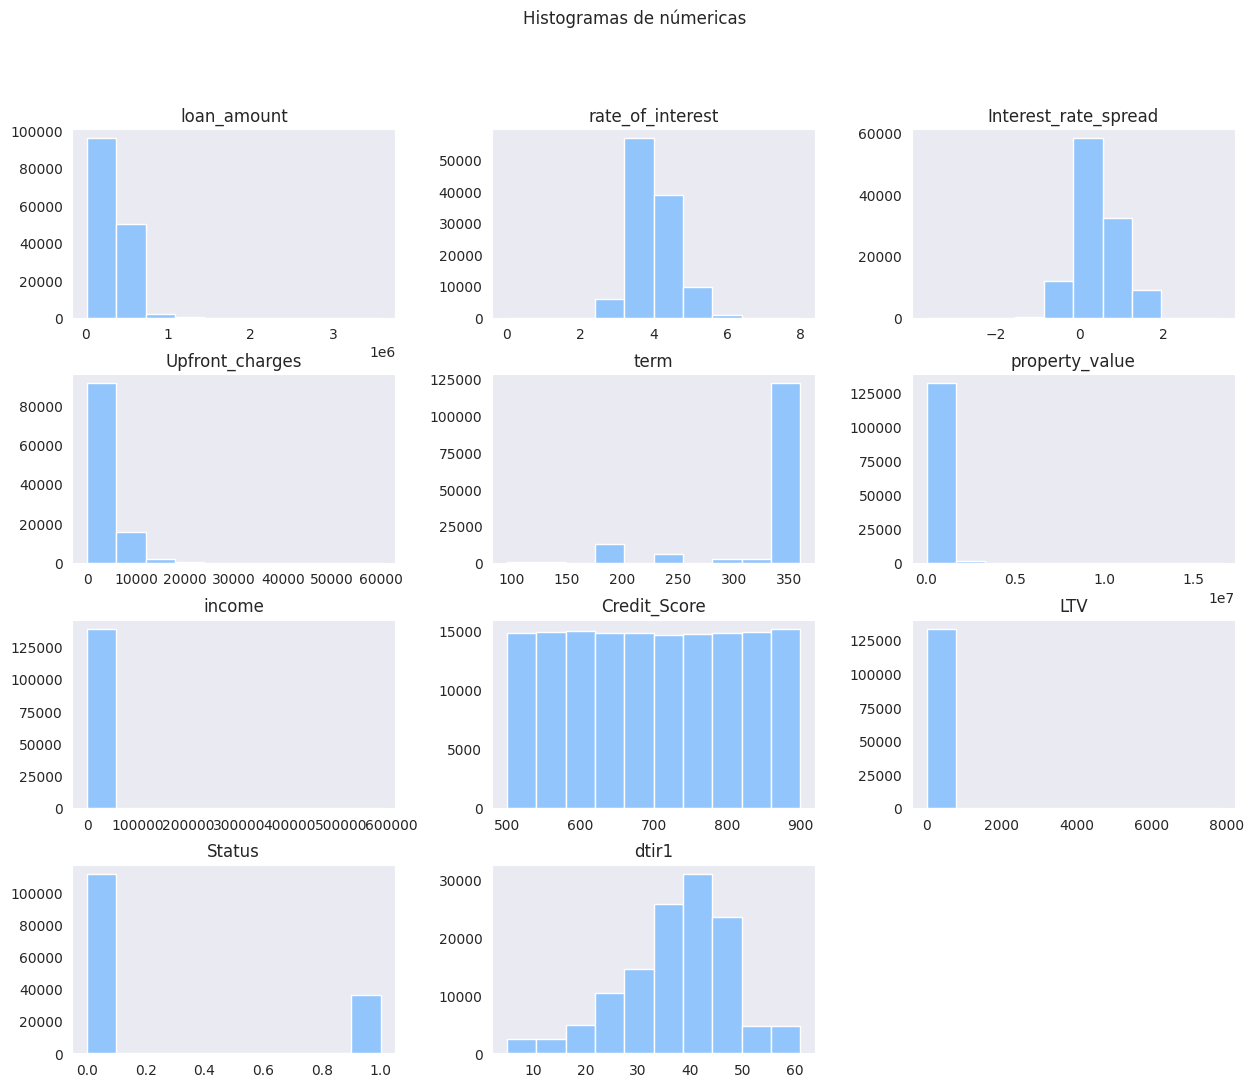

In [ ]:
numericas1= numericas.drop(columns=["ID","year"],axis=1) #eliminamos del histograma ID y año por que no son utiles para el análisis.
numericas1.hist(figsize=(15, 12), grid=False, color='#92C5FC')
plt.suptitle("Histogramas de númericas")
plt.show()


Observamos la distribución de las variables individuales. Hay varias variables númericas que seguirían la campana de gauss o tienden a eso. Por ende esas variables serían normales. En este caso rate_of_interest, interest_rate_spread, dtir1 son seguramente variables normales. Se pueden sumar a este grupo también loan_amount y upfront_charges. Las demas serían no normales.

###### Númericas normales:

Vamos a corroborar que las variables que muestra el histograma son normales. Si la media es similar a la mediana de una variable, la misma es normal o se podría calificar como normal. Entre el histograma y el calculo de la media y mediana definiremos las variables normales.

In [ ]:
#Analisis de media y mediana de cada variable
#creacion de un diccionario para almacenar los resultados
resultados  = { 'Columna': [], 'Media' : [], 'Mediana' : []}
#recorrer cada columna del dataset
for columna in numericas.columns:
    media = numericas[columna].mean()
    mediana = numericas[columna].median()
    resultados['Columna'].append(columna)
    resultados['Media'].append(media)
    resultados['Mediana'].append(mediana)

#creo un dataframe con los resultados para una mejor visualizacion
df_resultados = pd.DataFrame(resultados)

df_resultados

,Columna,Media,Mediana
0,ID,99224.500000,99224.50000
1,year,2019.000000,2019.00000
2,loan_amount,331117.743997,296500.00000
3,rate_of_interest,4.045476,3.99000
4,Interest_rate_spread,0.441656,0.39040
5,Upfront_charges,3224.996127,2596.45000
6,term,335.136582,360.00000
7,property_value,497893.465696,418000.00000
8,income,6957.338876,5760.00000
9,Credit_Score,699.789103,699.00000


Podemos observar entre el histograma y la validación de la media las variables normales son loan_amount, rate_of_interest, interest_rate_spread y dtir. Las demas serían no normales.

In [ ]:
normales = ['loan_amount','rate_of_interest','Interest_rate_spread','dtir1' ]
df_normales = numericas [normales]
df_normales.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'dtir1'], dtype='object')

###### Númericas no normales:

Las númericas no normales las obtenemos por decantación. Las númericas que no son normales son no normales.

In [ ]:
df_NOnormales = numericas.drop(columns= normales)
df_NOnormales.columns

Index(['ID', 'year', 'Upfront_charges', 'term', 'property_value', 'income',
       'Credit_Score', 'LTV', 'Status'],
      dtype='object')

##### Categóricas:

Las variables categóricas son aquellas de tipo objeto.

In [ ]:
categoricas = df.select_dtypes(include=['object'])
categoricas.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

#### **Valores nulos**

En esta instancia veremos la cantidad de datos nulos que tiene cada variable. Esto nos va a servir para entender que columnas debemos tratar en relación a los mismos.

In [ ]:
def nulls (df):
  n = df.isnull().sum()
  print(n[n>0])
  return n[n>0]

In [ ]:
n = nulls(df)

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


Como observamos en la lista de arriba. Hay 14 variables que contienen valores nulos. Estos vamos a tener que tratarlos aplicando distintas tecnicas. Las columnas que no figuran en la lista no tienen ningún nulo.
En el siguiente gráfico se ven las variables que tienen nulos.

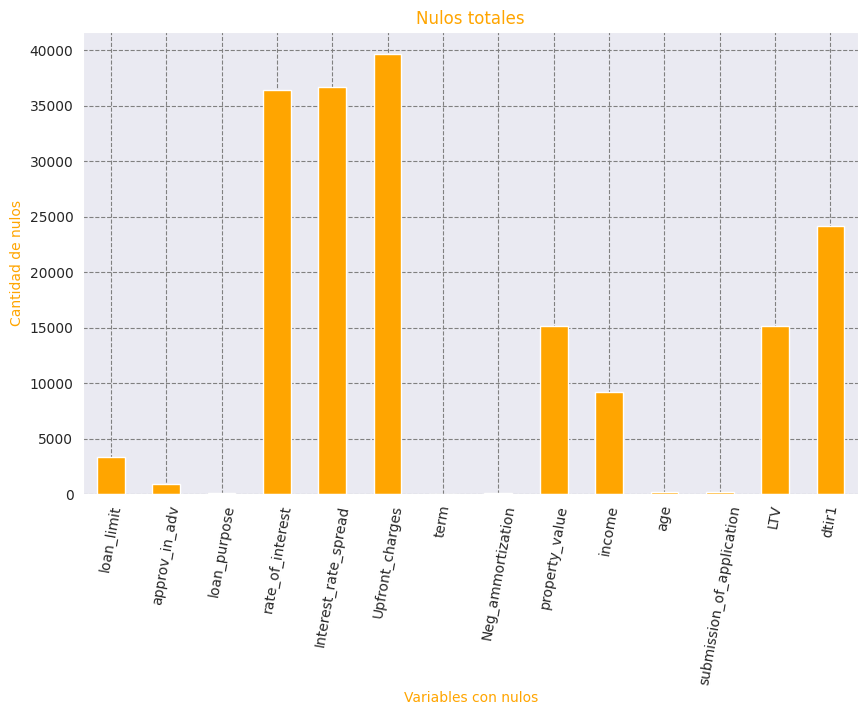

In [ ]:
# NULOS TOTALES POR VARIABLE

plt.figure(figsize=(10, 6))
n.plot(kind='bar', rot=80,color='orange')
plt.xlabel('Variables con nulos',color = 'orange')
plt.ylabel('Cantidad de nulos',color = 'orange')
plt.title('Nulos totales',color = 'orange')

plt.show()

Nulos en las variables categóricas:

In [ ]:
cate = nulls(categoricas)

loan_limit                   3344
approv_in_adv                 908
loan_purpose                  134
Neg_ammortization             121
age                           200
submission_of_application     200
dtype: int64


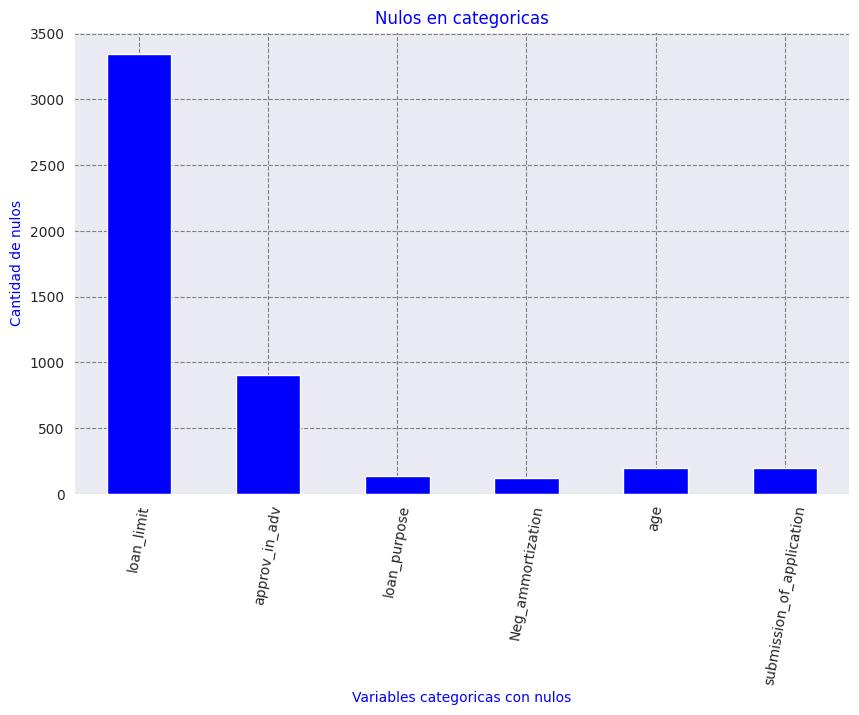

In [ ]:
plt.figure(figsize=(10, 6))
cate.plot(kind='bar', rot=80,color='blue')
plt.xlabel('Variables categoricas con nulos',color = 'blue')
plt.ylabel('Cantidad de nulos',color = 'blue')
plt.title('Nulos en categoricas',color = 'blue')

plt.show()

Nulos en númericas:

In [ ]:
nume = nulls(numericas)

rate_of_interest        36439
Interest_rate_spread    36639
Upfront_charges         39642
term                       41
property_value          15098
income                   9150
LTV                     15098
dtir1                   24121
dtype: int64


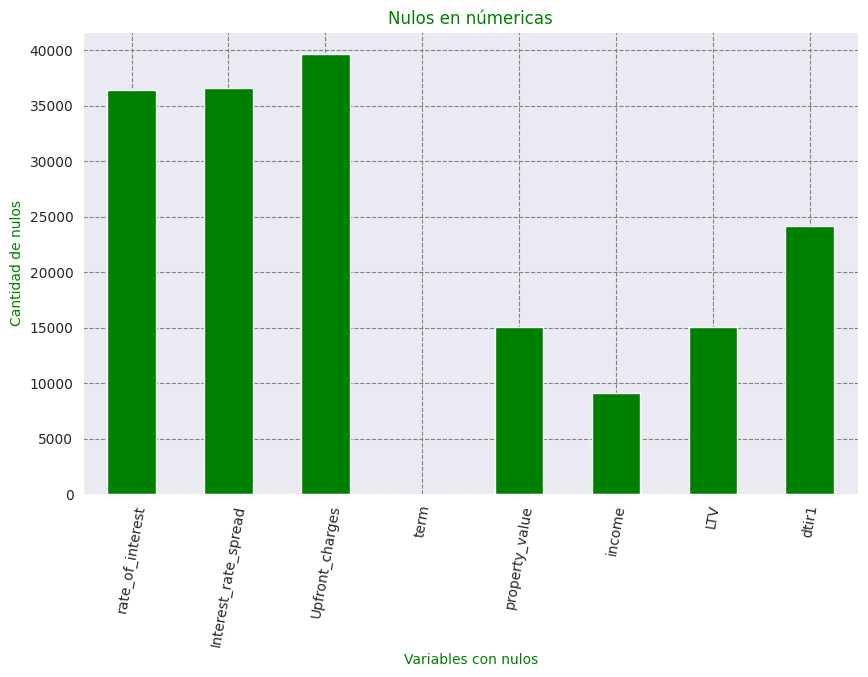

In [ ]:
plt.figure(figsize=(10, 6))
nume.plot(kind='bar', rot=80,color='green')
plt.xlabel('Variables con nulos',color = 'green')
plt.ylabel('Cantidad de nulos',color = 'green')
plt.title('Nulos en númericas',color = 'green')

plt.show()

Como podemos ver tanto en las variables categóricas como en las númericas encontramos valores nulos que hay que trabajar. En las númericas también encontramos nulos en las normales tanto como en las no normales. En el procesamiento de datos veremos si distinguimos entre ella de acuerdo a la técnica que utilizaremos.

#### **Conclusión Inicial**


- El dataset contiene un total de 148,670 registros, lo que se traduce en una base optima para el analisis y el modelo clasificatorio que queremos llevar a cabo.
- La variable **Status** es el centro del modelo y es fundamental para predecir si un prestario va a caer en default o no. Al ser binaria la variable, podría necesitar técnicas de balanceo. Es decir 1 es la clase minoritaria y podrían no ser suficiente los casos de impago para el entrenamiento del modelo. Esto lo analizaremos en el analisis univariado.
- Los tipos de datos con los que contamos son:
  - 13 variables númericas de las cuales 4 son normales y 9 no normales. Definiremos en el procesamiento de datos la relevancia de esto.
  - 21 variables categóricas de tipo objeto.
- Es importante considerar transformar las variables categoricas en números. Es decir codificar estas variables antes de incluirlas en nuestro modelo. Quizas a través de la tecnica one-hot encoding.
- Hay una cantidad considerable de datos nulos ya sea en las variables categóricas o las númericas normales o no normales. Lo cual hay que trabajar. Asi como parecería haber outliers


### Análisis Univariado:

In [ ]:
df.head(4).round(2)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.73,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.20,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.02,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.68,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.38,North,direct,0,42.0


In [ ]:
df.shape

(148670, 34)

Arriba corroboramos que el df este completo y no hayamos eliminado nada.

En el siguiente apartado aplicamos el comando describe para obtener estadistica de las variables númericas.

In [ ]:
df.iloc[:,2:].describe().round(2)

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.00,112231.00,112031.00,109028.00,148629.00,133572.00,139520.00,148670.00,133572.00,148670.00,124549.00
mean,331117.74,4.05,0.44,3225.00,335.14,497893.47,6957.34,699.79,72.75,0.25,37.73
std,183909.31,0.56,0.51,3251.12,58.41,359935.32,6496.59,115.88,39.97,0.43,10.55
min,16500.00,0.00,-3.64,0.00,96.00,8000.00,0.00,500.00,0.97,0.00,5.00
25%,196500.00,3.62,0.08,581.49,360.00,268000.00,3720.00,599.00,60.47,0.00,31.00
50%,296500.00,3.99,0.39,2596.45,360.00,418000.00,5760.00,699.00,75.14,0.00,39.00
75%,436500.00,4.38,0.78,4812.50,360.00,628000.00,8520.00,800.00,86.18,0.00,45.00
max,3576500.00,8.00,3.36,60000.00,360.00,16508000.00,578580.00,900.00,7831.25,1.00,61.00


**loan_amount:**
- Se observa que las filas no nulas son 148670. Por ende no hay nulos.
- El promedio de el monto de préstamos es 331117.74.
- El monto minimo es 16500 mientras que el maximo es 3576500.
- La desviación estandar es de 183909.31 por lo cual se observa una dispersión moderada de valores respecto a la media. Habría que ver si hay valores atipicos por préstamos grandes.

**rate_of_interest:**
- Hay nulos que cuantificamos en la sección de nulos.
- Promedio de la tasa de interes es de 4.05.
- Tasa minima es de 0 y la maxima de 8. Tenemos una std bastante baja lo que indica que la distribución es bastante simetrica en relación a la media. La media es similar a la mediana. No parece haber valores atípicos.
  


**Interest_rate_spread**
- Hay nulos que cuantificamos en la sección de nulos.
- El promedio es de 0.44.
- El valor minimo es - 3.64 y el maximo 3.36 años.
- La std es de 0.51. y la mediana es 0.39. Lo que sugiere que la distribución es simetrica. A pesar de ello deberiamos ahondar más en el analisis ya que los valores negativos podrían indicar valores atípicos.

**Upfront_charges:**
- Hay nulos.
- El promedio es 3225.
- El minimo es 0 y el máximo es 60000.
- La desviación estándar es alta: 3251,12. Esto nos indicaría que los valores se encuentran lejos de la media (hay dispersión). Pero tambien la std podría verse afectada por los valores atípicos.


**property_value:**
- Tiene nulos.
- El promedio es 497893,47.
- El minimo es 8000 y el maximo es 16508000 lo que indicaría que pueden existir datos atípicos. Ya que el valor maximo esta muy lejos de la media.
- La std es de 359935,32. La mediana es de 418000. Esto podría indicar una disperción moderada.

**income:**
- Hay nulos.
- El promedio es de 6957,34.
- El minimo es de 0 cero y el maximo es de 578580. Lo que sugiere valores atípicos altos. Ya sea en los minimos o en los maximos.
- El desvío standar es de 6496,59. Y la mediana es de 5760. Esto sugiere que la distribución es simetrica pero hay outliers.

**Credit_Score**
- No hay nulos.
- Tiene un promedio de 699,79.
- Minimo 500 y máximo de 900 aproximadamente.
- std 115,88. Es baja por lo que sugiere que no hay dispersión. La mediana es 699 casi igual al promedio. No se obervan valores atipicos.


**LTV**
- Hay nulos.
- Tiene un promedio de 72,75.
- Minimo 0.97 y máximo de 7831,25. Lo que sugiere valores atípicos si vemos la media.
- std 39,97. Es baja por lo que sugiere que no hay dispersión. La mediana es 75,14 parecida al promedio. Al parecer la distribución es simetrica con valores atípicos.   

**Status:**
- Aproximadamente el 25 % de los prestatarios cayo en default. Lo que sugiere que habría que balancear la variable target.

**dtir1**
- Hay nulos.
- Tiene un promedio de 37,73.
- Minimo 5 y máximo de 61 . Si observamos la media no pareciera haber valores atípicos.
- std 10,55. Es baja por lo que sugiere que no hay dispersión. La mediana es  parecida al promedio (39). Al parecer la distribución es simetrica sin valores atípicos.    


- **Valores extremos**: hay 6 variables que parecen presentar valores extremos a priori. Aquí podemos encontrar outliers o valores atípicos. Estas variables son: moderadamente loan_amount, Interest_rate_spread, Upfront_charges, property_value, income y LTV . Debe ser analizado cuando se realice el preprocesamiento de datos y la limpieza.

- **Datos faltantes**: Hay nulos en varias variables.Debe ser corroborado en la etapa de preprocesamiento de datos y corregido mendiante la elección de una técnica.   


### Hipótesis y análisis bivariado:

1. Existe una diferencia en cuanto al nivel de default de acuerdo al tipo de préstamo otorgado.
2. Existe una diferencia en cuanto al nivel de default de acuerdo al propósito del préstamo.
3. Cuanto mayor es el monto del préstamo, mayor es el incurrimiento en impago.
4. El default aumenta cuando la tasa de interés es mas alta: a mayor tasa de interés mayor default.
5. A menor ingreso/income del prestatario mayor default del préstamo.
6. El incurrimiento en impago varía linealmente en relación con el puntaje crediticio: a menor credit_score mayor incurrimiento en impago.

A continuación se buscarán posibles relaciones entre la variable target que quiero predecir: Status y las variables relevantes de nuestra hipotesis.

#### Diferencia de Default por tipo de préstamo

In [ ]:
# calculamos el numero de casos de default por tipo de préstamo. numero sin tener en cuenta la cantidad de préstamos por tipo.
status_by_type_sum = df.groupby('loan_type')['Status'].sum()
# Porcentaje de default de cada tipo. Se tiene en cuenta la cantidad de préstamos.
status_by_type_percentage = df.groupby('loan_type')['Status'].mean() * 100
print(status_by_type_sum,
status_by_type_percentage)

loan_type
type1    25775
type2     7172
type3     3692
Name: Status, dtype: int64 loan_type
type1    22.774867
type2    34.543878
type3    25.055989
Name: Status, dtype: float64


Si observamos el valor absoluto o la cantidad, creeriamos que el type 1 es el que tiene preponderancia de impagos. Pero si observamos los porcentajes, es decir, tomamos encuenta no solo los default sino la cantidad de préstamos por tipo otorgados nos damos cuenta que el tipo 2 es el que tiene mayor porcentaje de default. Es decir se otorgaron muchos más préstamos de tipo 1 por eso tiene mas caso de default. Pero si tomamos en cuenta la relación entre la cantidad de otorgados por tipo y la cantidad de default el tipo 2 tiene mayor proncetaje.

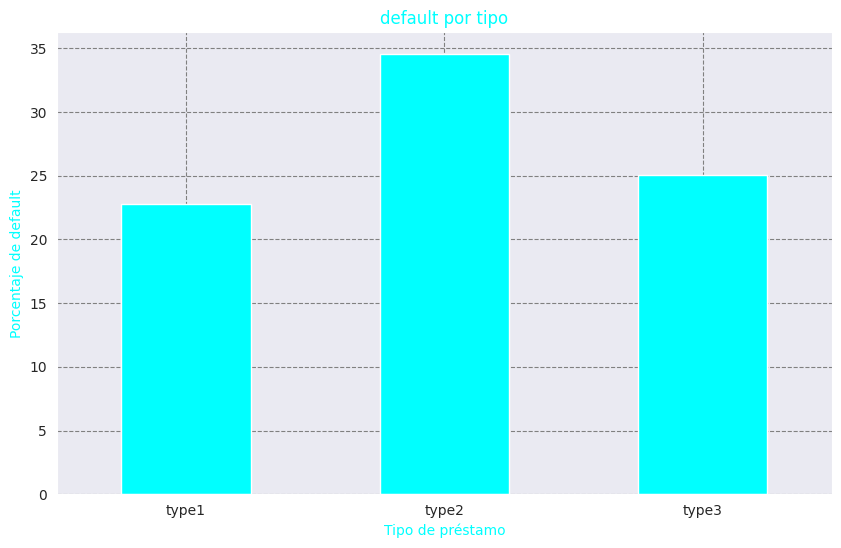

In [ ]:
plt.figure(figsize=(10, 6))
status_by_type_percentage.plot(kind='bar', rot=0,color='cyan')
plt.xlabel('Tipo de préstamo',color = 'cyan')
plt.ylabel('Porcentaje de default',color = 'cyan')
plt.title('default por tipo',color = 'cyan')

plt.show()


Podemos observar que hay una diferencia considerable entre el tipo 2 y los otros tipos (1 y 3) en cuanto a el default de préstamos. Si bien en cuanto al número de impagos, el tipo 1 tiene un mayor número cuando analizamos los porcentajes el tipo 2 tiene una considerable ventaja de defaults.
En conclusion: el tipo 2, con un 34,5% posee el indicador mas grande de default y las probabilidades mas grandes de incurrimiento en impago. El tipo 1 y 3 estan parejos.

#### Diferencia de Default por proposito del préstamo

In [ ]:
status_by_purpose_sum = df.groupby('loan_purpose')['Status'].sum()
status_by_purpose_percentage = df.groupby('loan_purpose')['Status'].mean() * 100
print(status_by_purpose_sum,
status_by_purpose_percentage)

loan_purpose
p1     8935
p2     1083
p3    13996
p4    12590
Name: Status, dtype: int64 loan_purpose
p1    25.876799
p2    33.078803
p3    25.022348
p4    22.974872
Name: Status, dtype: float64


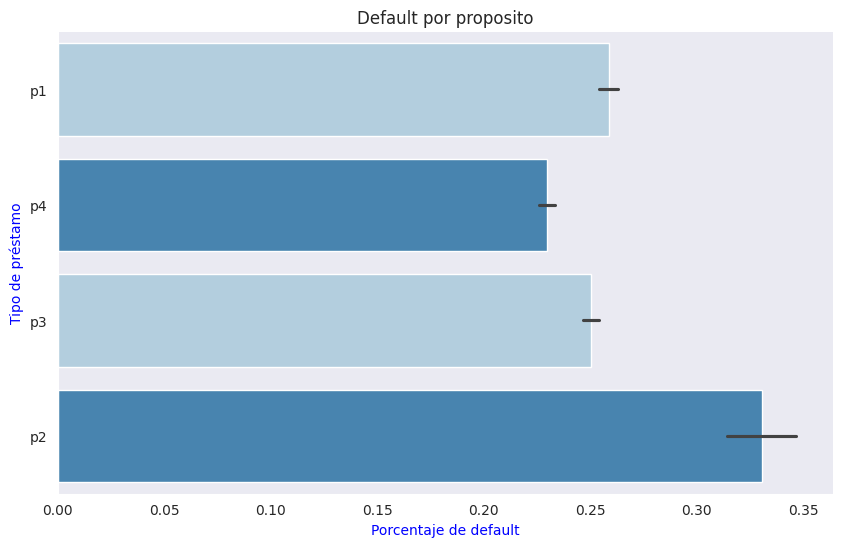

In [ ]:
custom_palette = sns.color_palette("Blues", 2)
plt.figure(figsize=(10,6))
sns.barplot(y='loan_purpose', x= 'Status', data=df, palette=custom_palette)
plt.title('Default por proposito')
plt.xlabel('Porcentaje de default')
plt.ylabel('Tipo de préstamo')

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
warnings.filterwarnings('ignore')

Podemos observar que el el proposito de préstamos p2 posee un porcentaje de default mayor que los otros propositos (p1,p3 y p4). Siempre hablando de porcentajes no de la suma de defaults. En tanto p1, p3 y p4 poseen un porcentaje de default similar.  En conclusión el proposito p2 tiene un porcentaje mas elevado de defaults.

#### Default y monto del préstamo

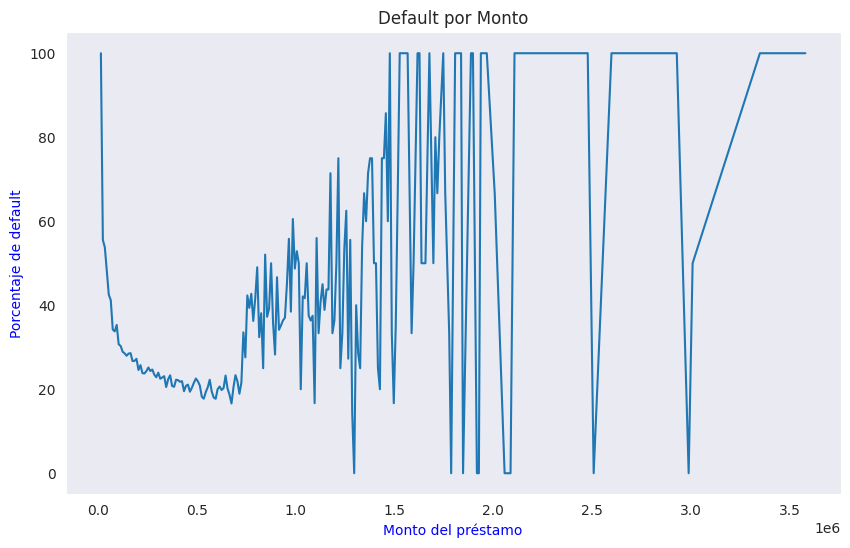

In [ ]:
status_by_amount = df.groupby('loan_amount')['Status'].mean() * 100
status_by_amount_df = pd.DataFrame({'Amount': status_by_amount.index, 'Status': status_by_amount.values})

plt.figure(figsize=(10,6))
#plt.figure()
ax = sns.lineplot(data= status_by_amount_df,x='Amount', y='Status') #sns.relplot(x = "x", y = "y", data = df, kind = "line");
ax.set(xlabel='Monto del préstamo', ylabel='Porcentaje de default', title='Default por Monto')
ax.grid()

Observamos que no hay una relación entre los montos mayores y la mayor tasa de default. Por ende la relacion o variación no es lineal: a mayor monto de los préstamos no hay mayor default. No hay un patrón claro. Y hay default en todos los percentiles del monto. Como así tambien observamos que se han otorgado muchos menos préstamos en los montos mayores.

#### Default y tasa de interés

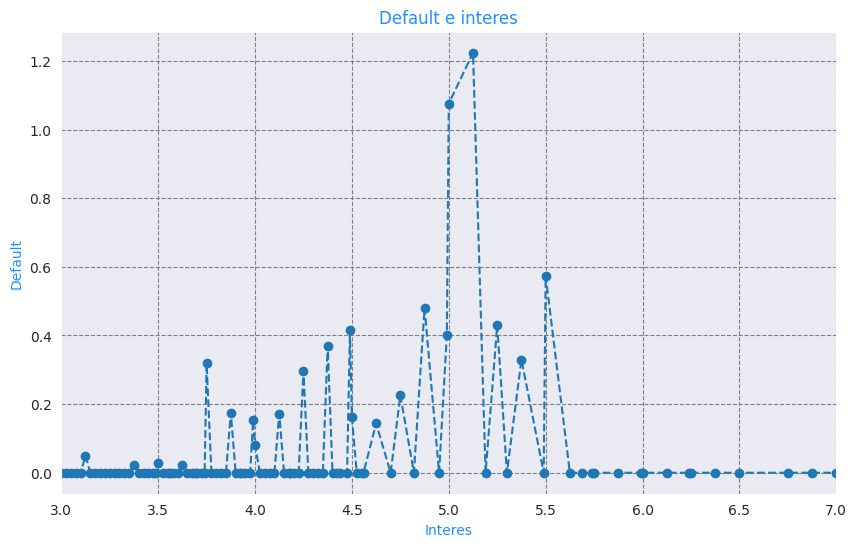

In [ ]:
status_by_interest = df.groupby('rate_of_interest')['Status'].mean() * 100
status_df = pd.DataFrame({'rate_of_interest':status_by_interest.index,'Status':status_by_interest.values})

filtered_df = status_df[status_df['Status'] < 10]
plt.figure(figsize=(10, 6))
#plt.plot()
plt.plot(filtered_df['rate_of_interest'], filtered_df['Status'], marker='o', linestyle='--')
plt.xlabel('Interes', color='dodgerblue')
plt.ylabel('Default', color='dodgerblue')
plt.title('Default e interes', color='dodgerblue')
plt.grid(True)
plt.xlim(3, 7)  # Establecer los límites del eje X


plt.show()

En este gráfico observamos que tampoco hay una correlacion lineal entre el porcentaje de interes y el incurrimiento en morosidad de un prestatario. No es una relación lineal. Es decir no encontramos un patrón en el cual a mayor interes mayor morosidad. Si bien cuando el porcentaje de interes supera el 3.5 comenzamos a tener casos de default y el pico se da en torno a al 5 porciento de interes, luego de ese 5 % cae en intereses mayores. No es lineal.
Aquí también deberiamos analizar luego ciertos datos que pueden ser outliers.

#### Default e ingreso

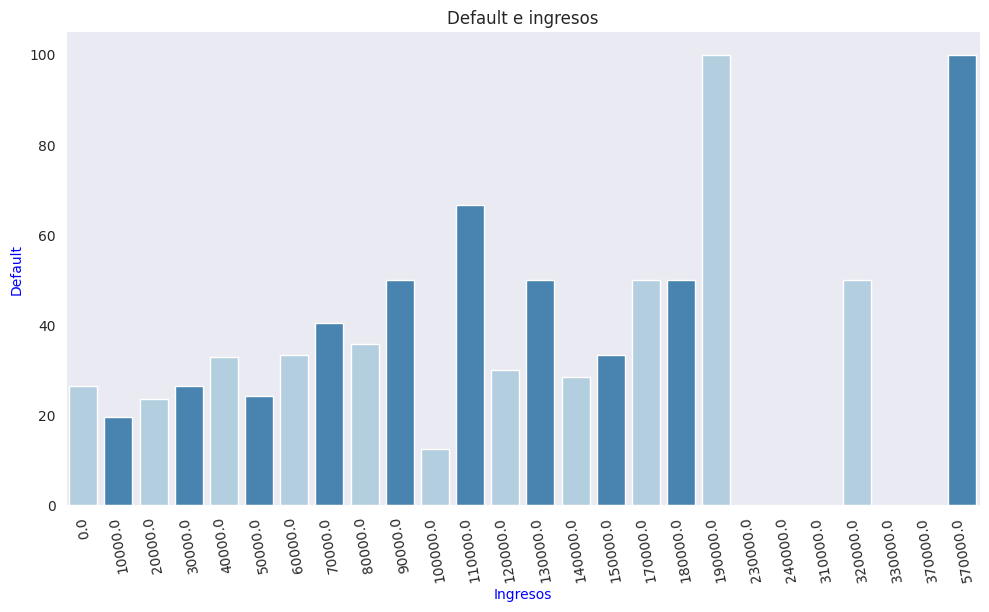

In [ ]:
df1 = df.copy()

df1['Income Group'] = (df['income'] // 10000) * 10000


default_by_income_group = df1.groupby('Income Group')['Status'].mean() * 100
default_by_income_group_df = pd.DataFrame({'income': default_by_income_group.index, 'Status': default_by_income_group.values})

custom_palette = sns.color_palette("Blues", 2)
plt.figure(figsize=(10,6))
sns.barplot(y='Status', x= 'income', data=default_by_income_group_df, palette=custom_palette)
plt.xticks(rotation=100)
plt.tight_layout()
plt.title('Default e ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Default')
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
warnings.filterwarnings('ignore')

Al contrario de lo que planteamos en nuestra premisa, la cual decia que a menor ingreso mayor morosidad, sucede al revés. El default se acrecienta con los mayores ingresos. Con algunas excepciones es casi lineal que a mayor ingreso mayor incurrimiento en impago. Algo impensado en nuestras primeras visualizacioens.  

#### Default y puntaje crediticio

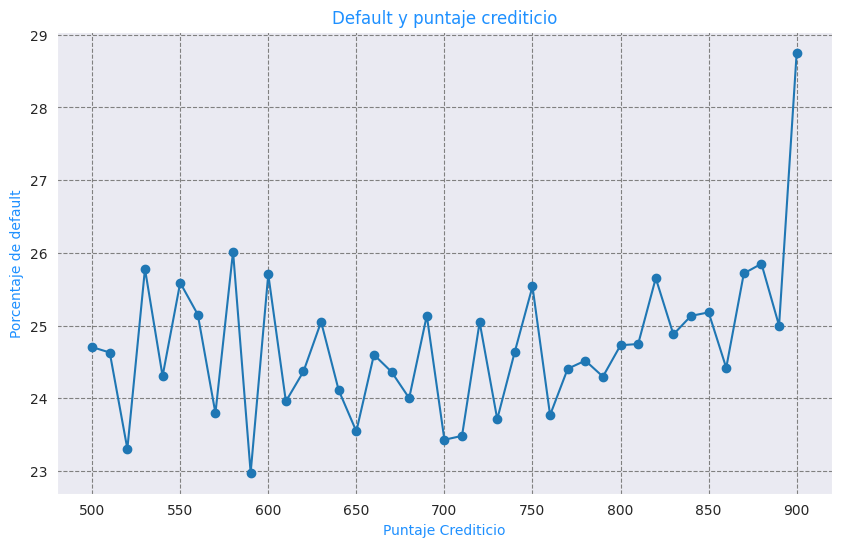

In [ ]:
df2= df.copy()

df2['credit_score_group'] = (df2['Credit_Score'] // 10) * 10
status_by_credit_percentage = df2.groupby('credit_score_group')['Status'].mean() * 100


plt.figure(figsize=(10, 6))
#plt.plot(churn_df['credit_score'],churn_df['churn'], marker='o', linestyle='--')
plt.plot(status_by_credit_percentage.index,status_by_credit_percentage.values, marker='o')
plt.xlabel('Puntaje Crediticio', color='dodgerblue')
plt.ylabel('Porcentaje de default', color='dodgerblue')
plt.title('Default y puntaje crediticio', color='dodgerblue')
plt.grid(True)

plt.show()


Observamos que no hay una relación lineal entre menor puntaje crediticio y mayor default. Incluso se observa que en el ultimo percentil de puntaje (900) hay mas deserción. Además los valores de default se mantienen similares en todos los puntajes. Es decir hay default de manera similar en todos los puntajes.

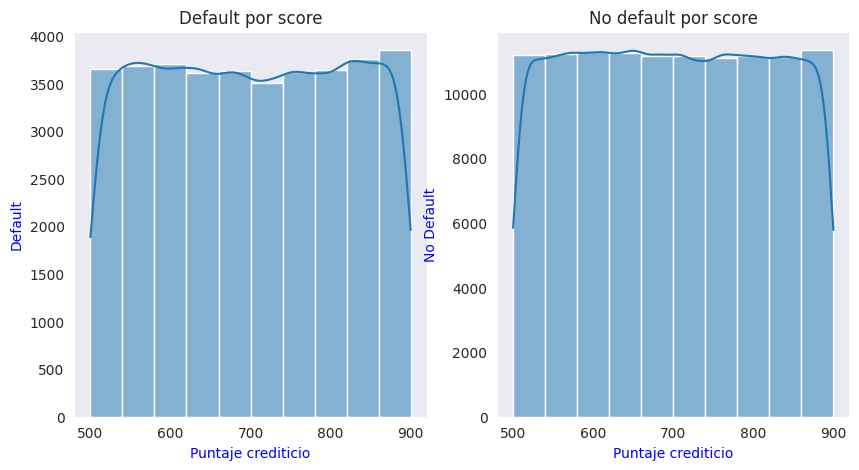

In [ ]:
df3 = df.copy()

status = df3[df3['Status'] == 1]
no_status = df3[df3['Status'] == 0]

#status['credit_score_group'] = (status['Credit_Score'] // 10) * 10
#status_by_credit_percentage = status.groupby('credit_score_group')['Status'].mean()
#status_by_credit_percentage_df = pd.DataFrame({'credit': status_by_credit_percentage.index, 'status': status_by_credit_percentage.values})

#no_status['credit_score_group'] = (no_status['Credit_Score'] // 10) * 10
#no_status_by_credit_percentage = no_status.groupby('credit_score_group')['Status'].mean()
#no_status_by_credit_percentage_df = pd.DataFrame({'credit': no_status_by_credit_percentage.index, 'status': no_status_by_credit_percentage.values})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax= sns.histplot(x="Credit_Score", data=status,ax=axes[0], bins=10,kde=True)
ax.set(xlabel='Puntaje crediticio', ylabel='Default', title='Default por score')
ax.grid()

ax= sns.histplot(x="Credit_Score", data=no_status,ax=axes[1],bins=10, kde=True)
ax.set(xlabel='Puntaje crediticio', ylabel='No Default', title='No default por score')
ax.grid()




Observamos que tanto en los prestatarios que defaultearon como en lo que no se comportan del mismo modo. Pon ende no hay relación lineal. Entre menor puntaje no hay mayor default.